In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

# Load dataset

In [3]:
boston_dataset = load_boston()

In [4]:
boston_dataset.data.shape

(506, 13)

In [5]:
boston_dataset.target.shape

(506,)

In [8]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
type(boston_dataset.DESCR)

str

In [12]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [13]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Add Target column 'MEDV' to dataframe

In [15]:
df['MEDV'] = boston_dataset.target

In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [23]:
df.isnull().sum() # No missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Visualize the dataset

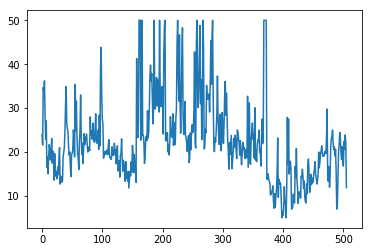

In [19]:
plt.plot('MEDV', data=df)
plt.show()

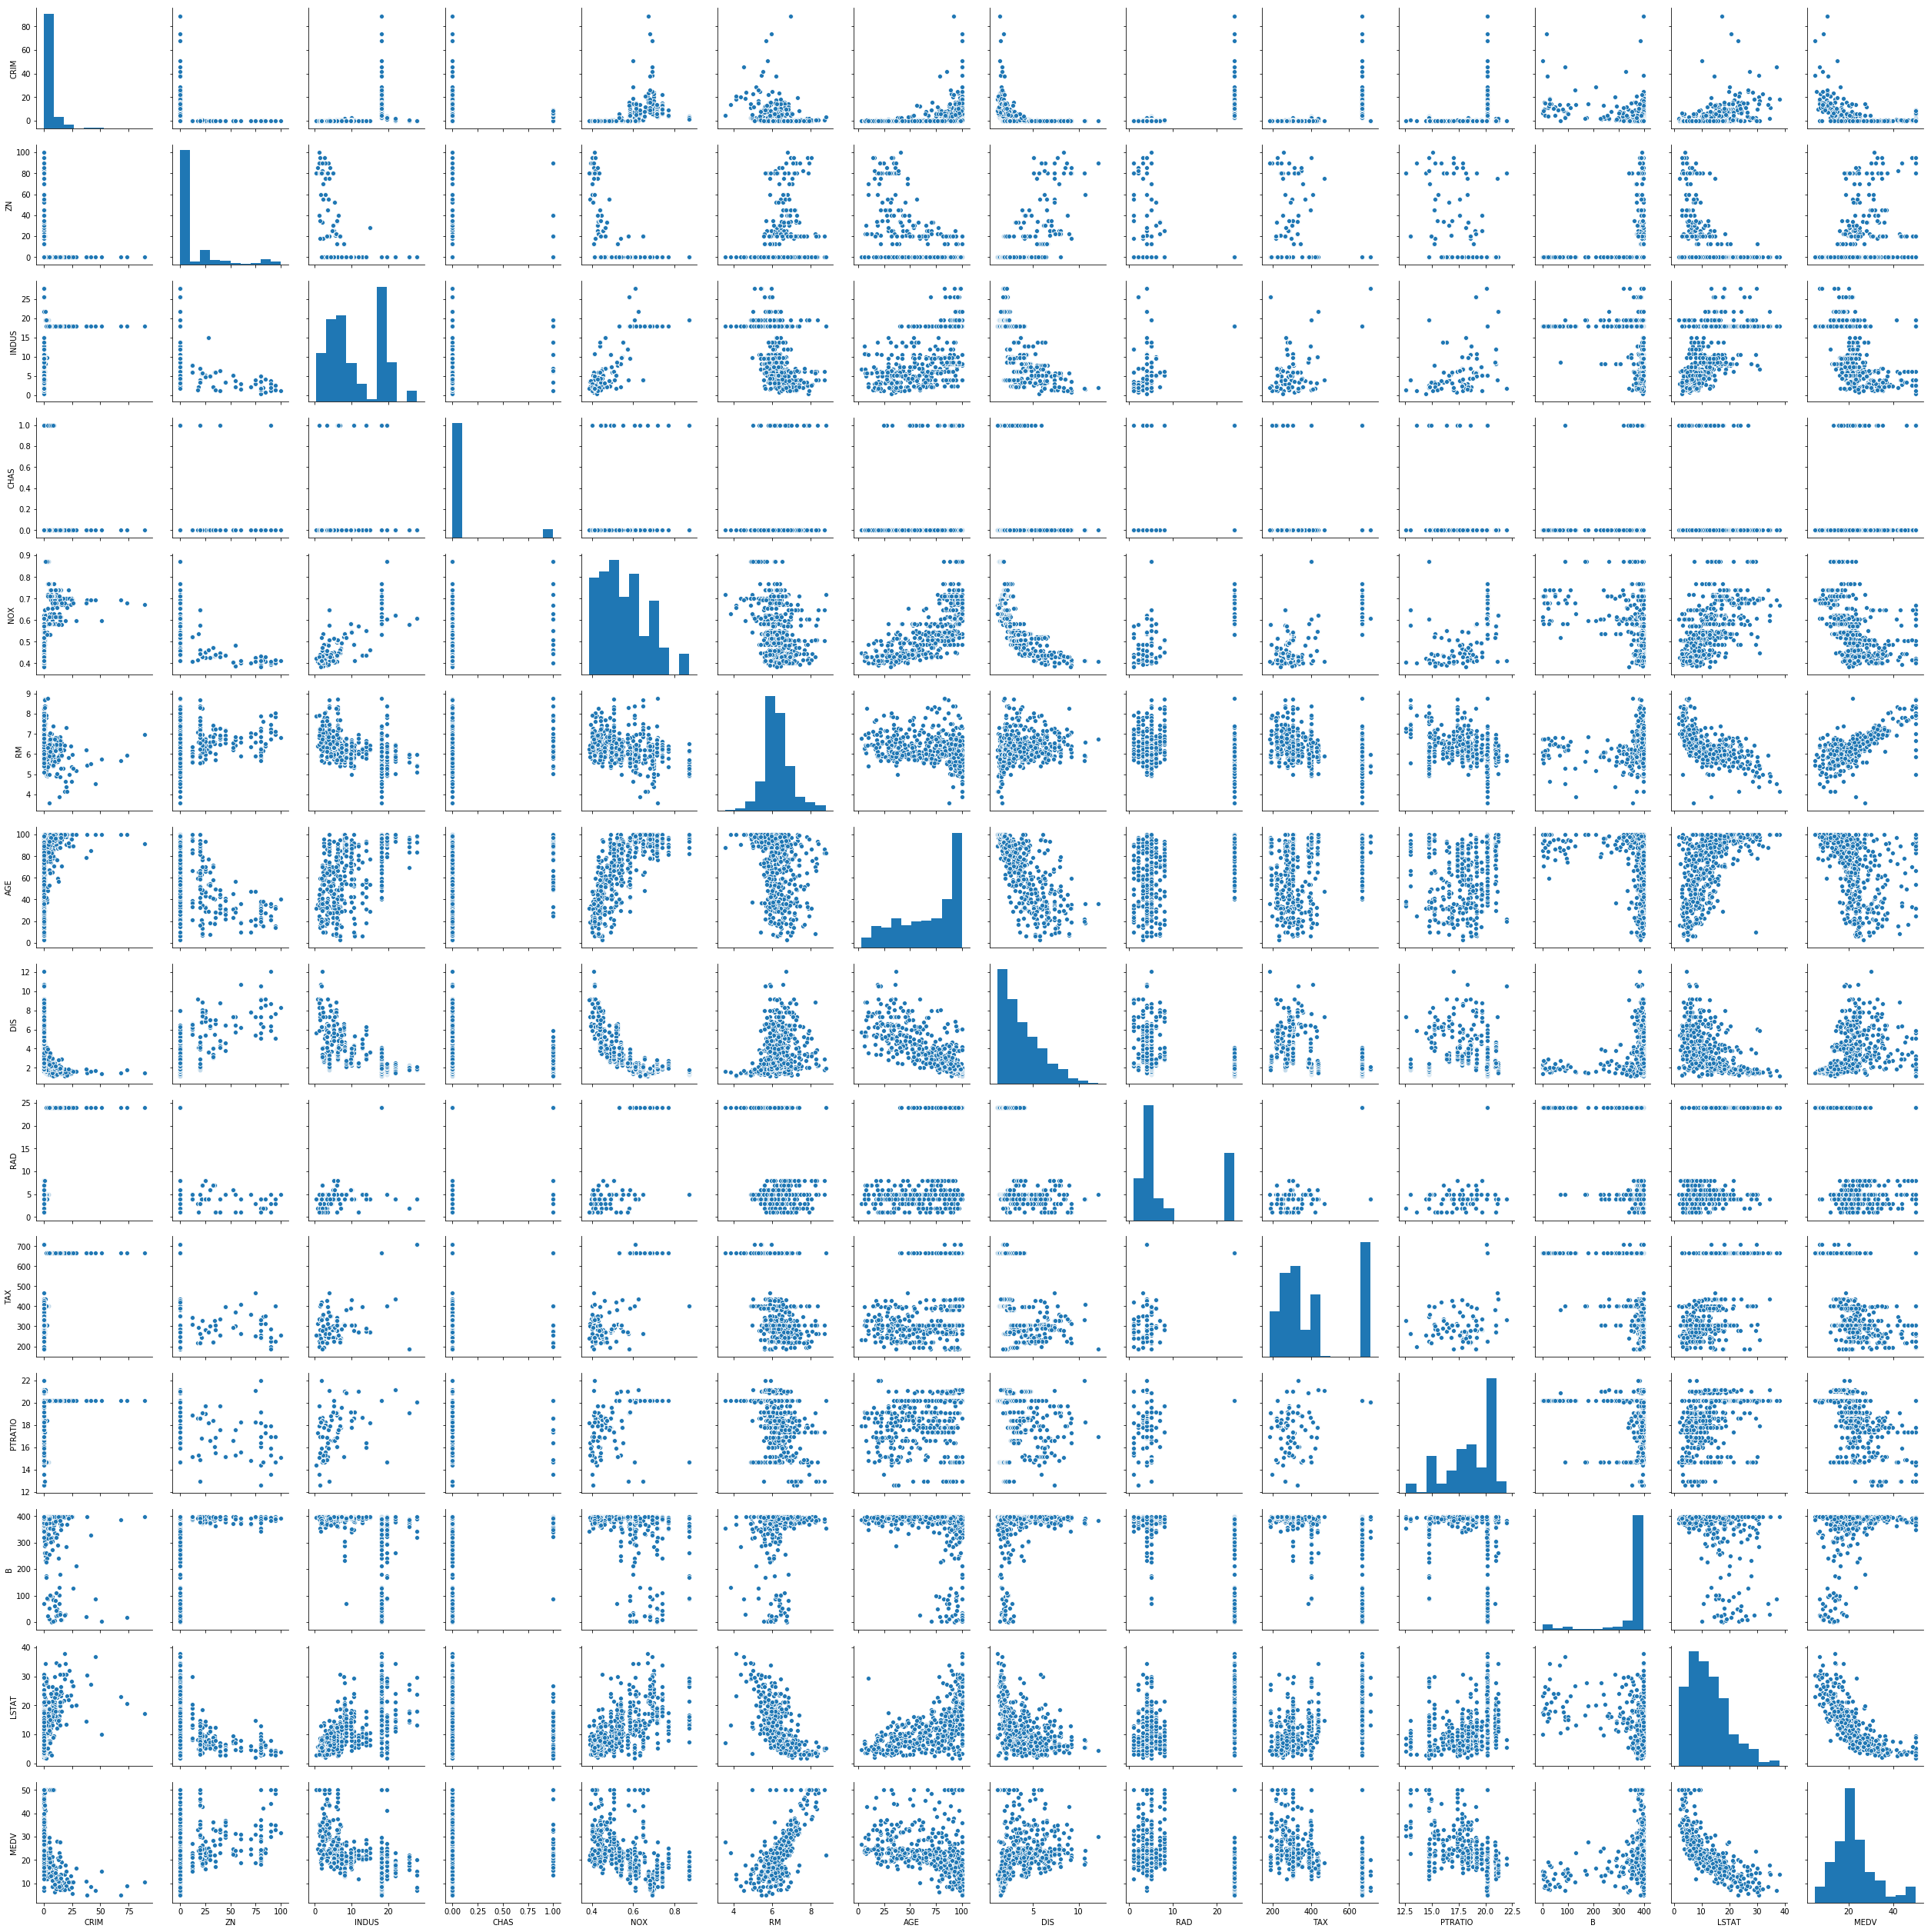

In [21]:
sns.pairplot(df)

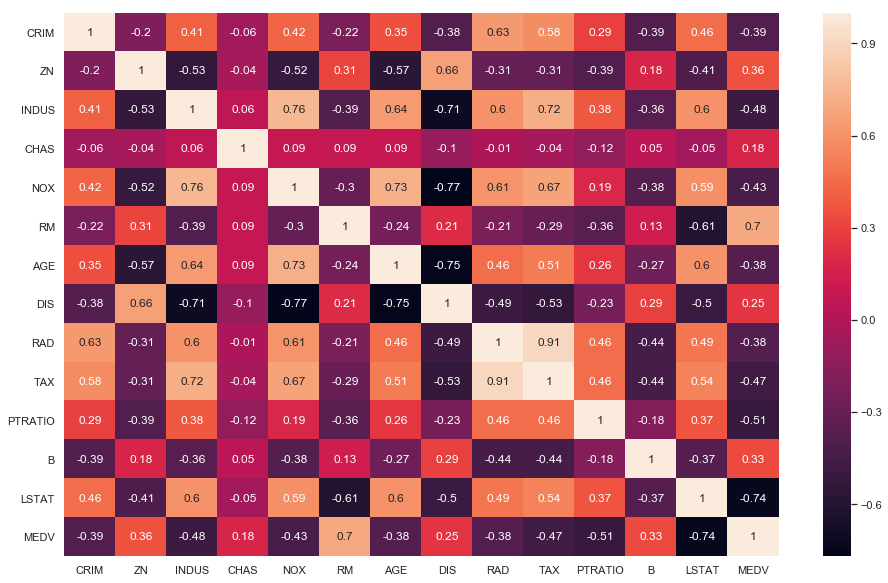

In [28]:
# Check Correlation using Heatmap
sns.set(rc={'figure.figsize':(16, 10)})
corr_mat = df.corr().round(2)
sns.heatmap(corr_mat, annot=True)

From above correlation matrix, we can observe:
1. Target 'MEDV' is +ve-correlated to RM(0.7) and -ve-correlated to LSTAT(-0.74)
2. Features 'NOX' & 'INDUS' are +ve correlated (0.76)
3. Features 'AGE' is +ve correlated with 'INDUS'(0.64), 'NOX' (0.73)
4. Features 'DIS' is +ve correlated with 'ZN'(0.66) and -ve correlated with 'INDUS' (-0.71), 'NOX' (-0.77), 'AGE' (-0.75)
5. Features 'RAD' is +ve correlated with 'CRIM'(0.63), 'INDUS' (.6), 'NOX' (0.61)
6. Features 'TAX' is +ve correlated with 'INDUS'(0.72), 'NOX' (.67), 'RAD' (0.91)
7. Features 'LSTAT' is +ve correlated with 'INDUS'(0.6), 'AGE' (0.6) and -ve correlated with 'RM' (-0.61)

Hence, we choose following features for our model training
features_selected = ['RM', 'LSTAT', 'CRIM', 'ZN', 'CHAS', 'NOX', 'PTRATIO', 'B']

# Define function to calculate RMSE, R-Squared for features selected

In [82]:
def plot_features_vs_target(features):
    plt.figure(figsize=(20,5))

    y = df['MEDV']
    
    for i, col in enumerate(features):
        plt.subplot(1, len(features), i+1)
        x = df[col]
        plt.scatter(x, y, marker='o')
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel('MEDV')
        
def display_metrics(features):
    plot_features_vs_target(features)
    
    X = df[features]
    Y = df['MEDV']
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_predict = model.predict(X_test)
    
    print('Root Mean squared error=', np.sqrt(mean_squared_error(Y_test, Y_predict)))
    print('R-Squared=',r2_score(Y_test, Y_predict))

# Model 1

Root Mean squared error= 5.664252472426871
R-Squared= 0.6753556251471675


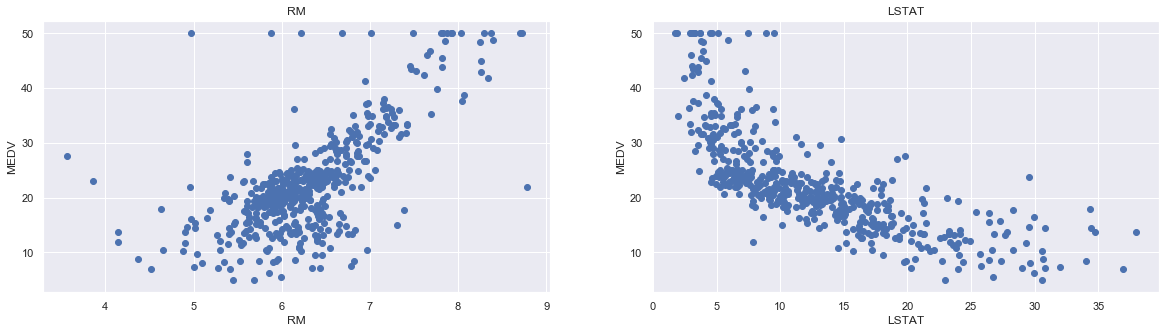

In [84]:
features_selected = ['RM', 'LSTAT']

display_metrics(features_selected)

# Model 2

Root Mean squared error= 5.679151844025141
R-Squared= 0.6736454757947041


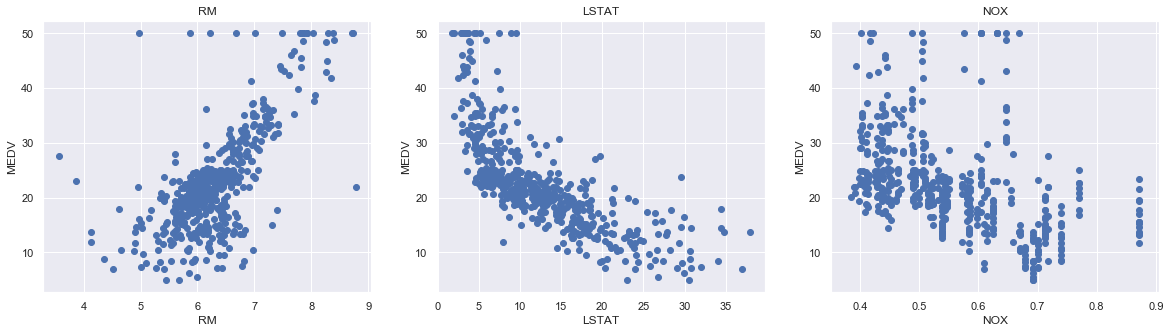

In [85]:
features_selected = ['RM', 'LSTAT', 'NOX']

display_metrics(features_selected)

# Model 3

Root Mean squared error= 5.474914616536911
R-Squared= 0.6966965309874331


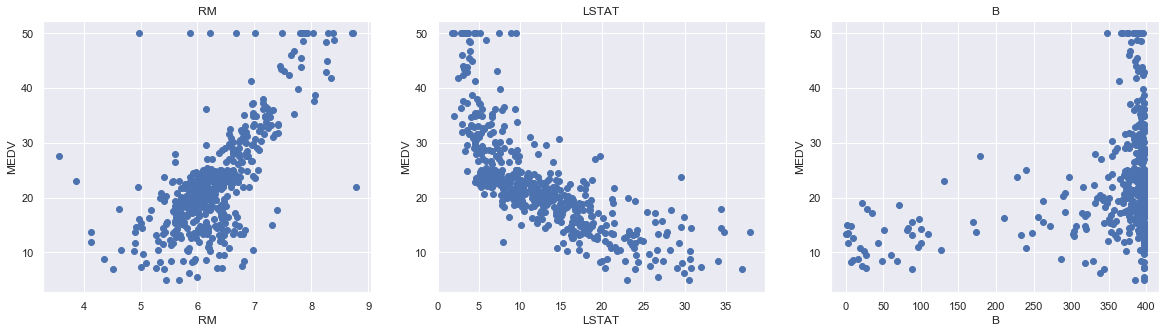

In [86]:
features_selected = ['RM', 'LSTAT', 'B']

display_metrics(features_selected)

# Model 4

Root Mean squared error= 5.326803162891745
R-Squared= 0.7128849391891194


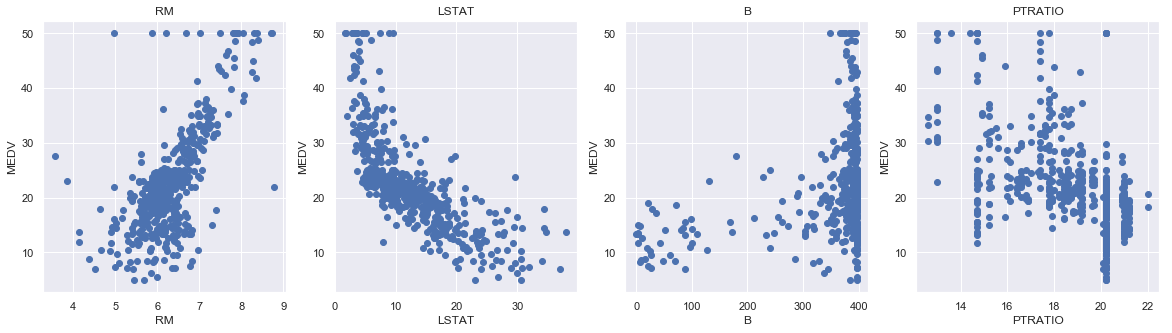

In [88]:
features_selected = ['RM', 'LSTAT', 'B','PTRATIO']

display_metrics(features_selected)

# Model 5

Root Mean squared error= 5.190044263029011
R-Squared= 0.7274383184878201


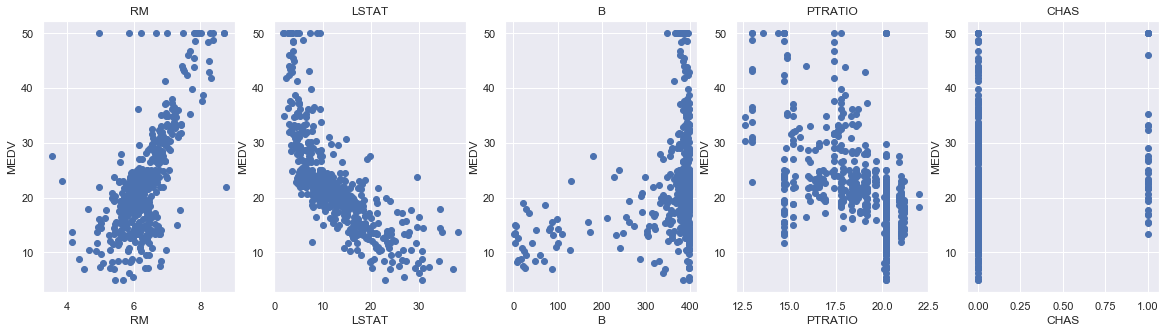

In [89]:
features_selected = ['RM', 'LSTAT', 'B','PTRATIO','CHAS']

display_metrics(features_selected)

# Model 6

Root Mean squared error= 5.199205199304155
R-Squared= 0.7264752731945501


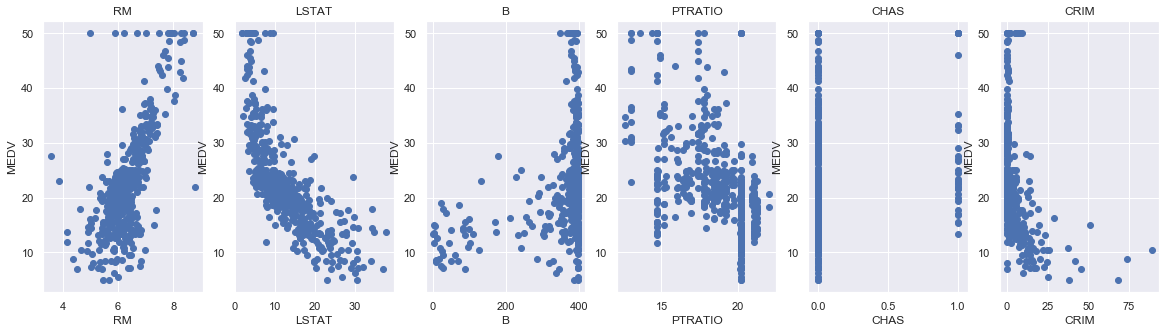

In [90]:
features_selected = ['RM', 'LSTAT', 'B','PTRATIO','CHAS', 'CRIM']

display_metrics(features_selected)

# Model 7

Root Mean squared error= 5.218942721856373
R-Squared= 0.7243945905957463


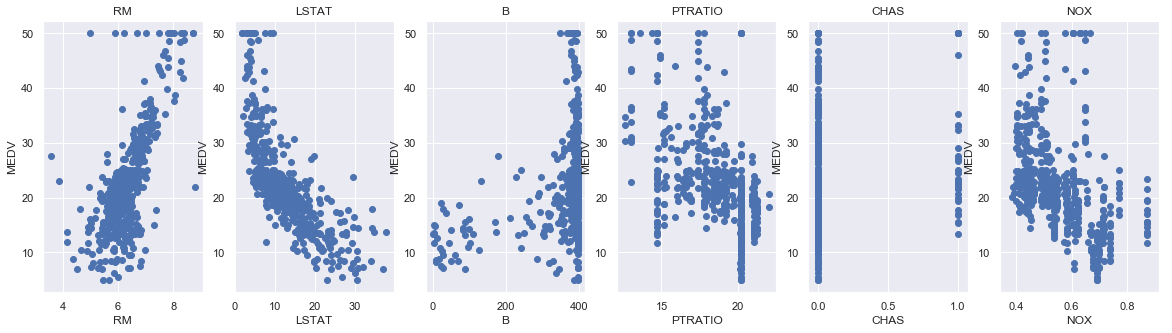

In [91]:
features_selected = ['RM', 'LSTAT', 'B','PTRATIO','CHAS', 'NOX']

display_metrics(features_selected)

# Model 8

Root Mean squared error= 5.190053271300825
R-Squared= 0.727437372325622


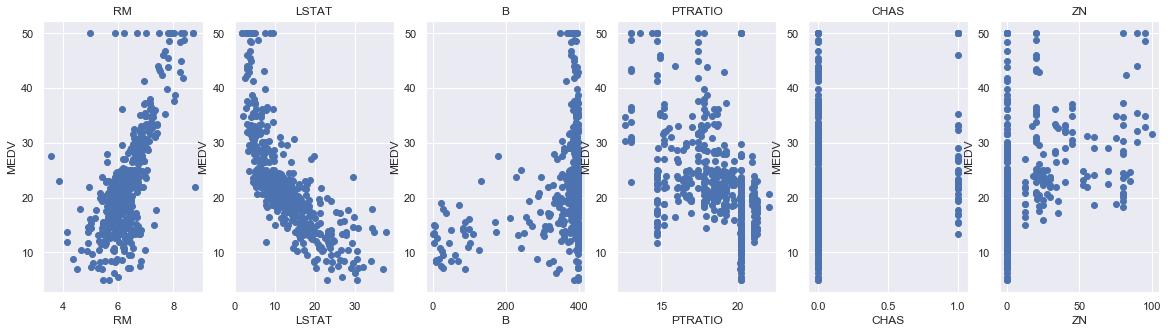

In [92]:
features_selected = ['RM', 'LSTAT', 'B','PTRATIO','CHAS', 'ZN']

display_metrics(features_selected)

# Model 9

Root Mean squared error= 4.835373458200553
R-Squared= 0.7634174432138457


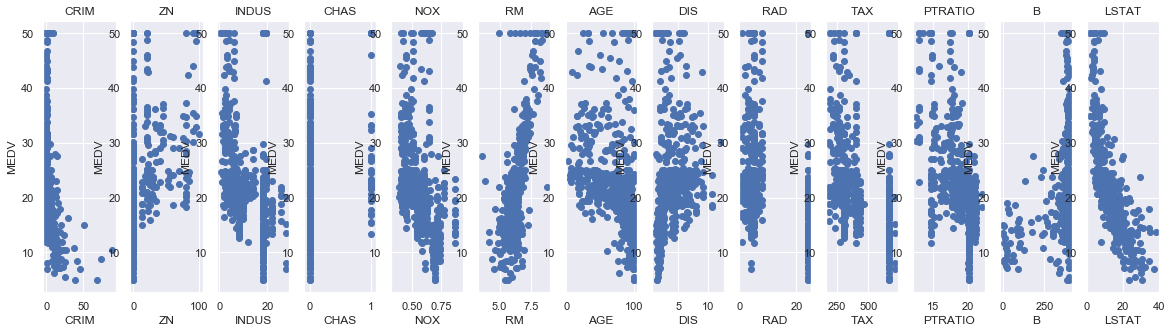

In [98]:
# Take all features
features_selected  = df.columns.drop('MEDV')

display_metrics(features_selected)

# Model 10

Root Mean squared error= 4.94044233095363
R-Squared= 0.7530242318706908


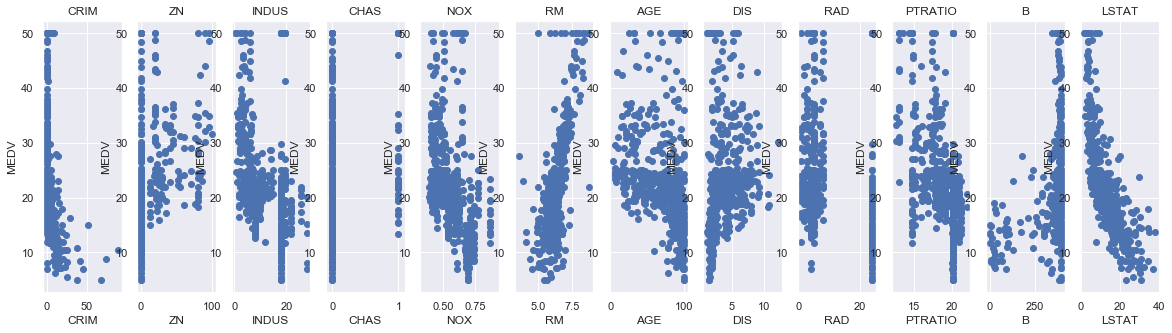

In [101]:
# Take all features - TAX (As RAD and TAX are highly correlated)
features_selected  = df.columns.drop(['TAX', 'MEDV'])

display_metrics(features_selected)

# Final model (Model 9)

Root Mean squared error= 4.835373458200553
R-Squared= 0.7634174432138457


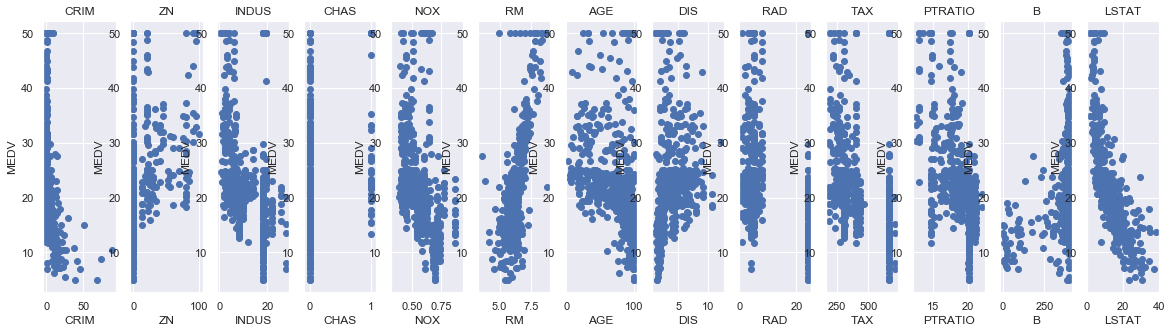

In [102]:
# Take all features
features_selected  = df.columns.drop('MEDV')

display_metrics(features_selected)

R-Squared = 0.76 is good for the model